# Random Forest Classifier
* Random Forest Classifier is an extension of decision trees that improves their performance, reduces overfitting, and provides more robust prediction. Trees in random forest are built using the following steps:
    1. A random subset of training data (bootstrapped sample) is selected
    2. A random subset of features is selected
    3. A decision tree is built using the selected data and features using some measure of impurity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Generate data
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a Decision Tree classifier
rf = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best Decision Tree model from grid search
best_rf = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_rf.predict(X_test)

# Calculate the accuracy of the model
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Best Estimators: {best_rf.n_estimators}")
print(f"Best Max Depth: {best_rf.max_depth}")
print(f"Best Min Samples Split: {best_rf.min_samples_split}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best Estimators: 50
Best Max Depth: None
Best Min Samples Split: 10
Accuracy: 0.93
F1: 0.93
Precision: 0.92
Recall: 0.94


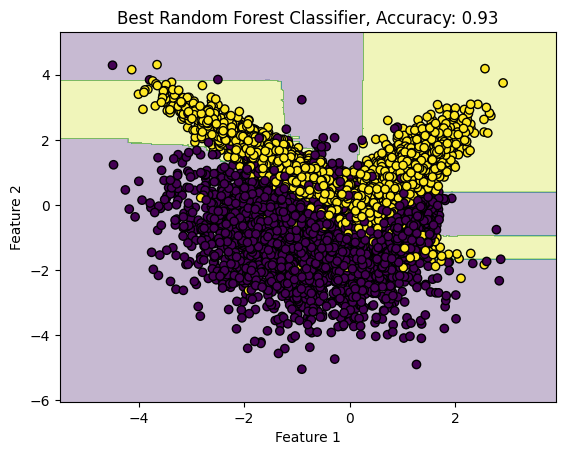

In [5]:
# Plot the decision boundary (Note: Random Forests don't have a single decision boundary)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Best Random Forest Classifier, Accuracy: {accuracy:.2f}')
plt.show()